In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv(
    'Restaurant_Reviews.tsv',
    delimiter = '\t', # 分割
    quoting = 0 # 處裡引號方式
    )
"""
quoting=0 csv.QUOTE_MINIMAL 所以字都當有引號(預設)
quoting=1 csv.QUOTE_AL 有特殊符號才會有引號
quoting=2 csv.QUOTE_NONNUMERIC 只保留字串的引號
quoting=3 csv.QUOTE_NONE 完全忽略文件中的引號
"""
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Cleaning the texts

In [4]:
!pip install nltk

In [5]:
import re
import nltk
nltk.download('stopwords') # 並下載停用詞 -> 常見但無意義的詞，例如 "the"、"is"、"and"。
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


corpus = []
for i in range(0, 1000):
    # 取句子
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower() # 轉小寫
    review = review.split() # 切割(字)

    # TODO: 去掉停用詞並詞幹化
    ps = PorterStemmer() # 初始化一個詞幹化器，用於將單字還原為詞根。
    all_stopwords = stopwords.words('english') # 獲取英文的停用詞列表
    all_stopwords.remove('not') # 從停用詞中移除 "not"，因為 "not" 在情感分析中通常具有重要意義。
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    # TODO: 合併為處理後的句子
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33313\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
pd.DataFrame(corpus).head()

,0
0,wow love place
1,crust not good
2,not tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price


## Creating the Bag of Words model(字袋)

In [7]:
# 將文本數據轉換為 Bag-of-Words (詞袋) 的形式
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(corpus).toarray() # 文字數據轉換為數字特徵矩陣
y = dataset.iloc[:, -1].values

In [10]:
X.shape, y.shape

((1000, 1566), (1000,))

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
from sklearn.naive_bayes import GaussianNB # 高斯朴素貝葉斯
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(X_test)
print(type(y_pred)) # <class 'numpy.ndarray'>
print(type(y_test)) # <class 'pandas.core.frame.DataFrame'>

# 確保 y_pred 和 y_test 是 NumPy 陣列
# y_pred_numpy = y_pred.to_numpy().flatten()  # 從 DataFrame 提取為 NumPy 陣列並展平
# y_test_numpy = y_test.to_numpy().flatten()  # 將 y_test 也轉換為 NumPy 陣列並展平

# 合併成 DataFrame
result_df = pd.DataFrame({
    "y_pred": y_pred,  # 一維的預測值
    "y_test": y_test   # 一維的真實值
})

# 顯示結果
result_df.head()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


,y_pred,y_test
0,1,1
1,0,0
2,1,1
3,1,1
4,0,1


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.645

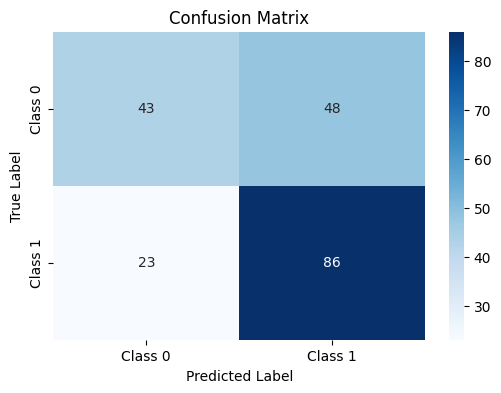

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 繪製熱圖
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()